## Symmetry Code Tests

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generating a rotation matrix for known angles

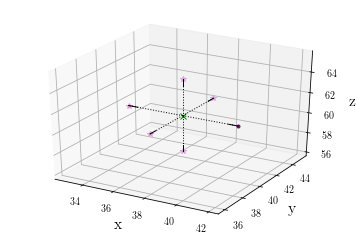

In [63]:
import mbii.symmetrise_lib as lib
import fitsio as fi



# Read in the catalogues from coma
base = '/Users/hattifattener/Documents/ias/mbii/2pt/ns300_nd1000/v6/'
fid = fi.FITS('/Users/hattifattener/Documents/ias/mbii/cats/base_subhalo_shapes-v9-ndm1000-nst300-radial.fits')[-1].read()
sym = fi.FITS('/Users/hattifattener/Documents/ias/mbii/cats/base_subhalo_shapes-v9-ndm1000-nst300-radial-symmetrised0.fits')[-1].read()

# Select a point to rotate about. This is entirely arbitrary.
select = (fid['halo_id']==0)
x0=sym['x0'][select].mean()
y0=sym['y0'][select].mean()
z0=sym['z0'][select].mean()

i=11
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Starting position of the test galaxy, offset from the pivot by some distance along one axis
x1 = x0+3.5
y1 = y0
z1 = z0
# Let's just have it pointing radially towards the centroid.
dx = x1-x0
dy = y1-y0
dz = z1-z0
vec = np.array([dx,dy,dz])
vec /= np.sqrt(sum(vec*vec))
a1 = vec[0]
a2 = vec[1]
a3 = vec[2] 

# Plot its position and shape prior to rotation
ax.plot([x0,x1], [y0,y1], [z0,z1], ':', color='k')
v = np.array([a1,a2,a3])*0.6
ax.plot([x1], [y1], [z1], '.', color='purple')
ax.plot([x1,x1-v[0]], [y1,y1-v[1]], [z1,z1-v[2]], '-', color='k')
ax.plot([x0], [y0], [z0], 'x', color='g')
ax.set_xlabel('x ', fontsize=16)
ax.set_ylabel('y ', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_zlim(z0-5, z0+5)
ax.set_ylim(y0-5, y0+5)
ax.set_xlim(x0-5, x0+5)

# Rotate
R = lib.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=np.pi/2)
a3d = np.array([a1,a2,a3])
arot = np.dot(R,a3d)*-1
pos = np.array([x1-x0,y1-y0,z1-z0])
rot = np.dot(R,pos)

# Replot
ax.plot([rot[0]+x0], [rot[1]+y0], [rot[2]+z0], '*', color='plum')
ax.plot([x0, rot[0]+x0], [y0, rot[1]+y0], [z0, rot[2]+z0], ':', color='k')
v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rot[0]+x0, rot[0]+x0+v[0]], [rot[1]+y0, rot[1]+y0+v[1]], [rot[2]+z0, rot[2]+z0+v[2]], '-', color='k')


# Now repeat the last two steps for a few more end configurations
R = lib.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=np.pi)
a3d = np.array([a1,a2,a3])
arot = np.dot(R,a3d)*-1
pos = np.array([x1-x0,y1-y0,z1-z0])
rot = np.dot(R,pos)
ax.plot([rot[0]+x0], [rot[1]+y0], [rot[2]+z0], '*', color='plum')
ax.plot([x0, rot[0]+x0], [y0, rot[1]+y0], [z0, rot[2]+z0], ':', color='k')
v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rot[0]+x0, rot[0]+x0+v[0]], [rot[1]+y0, rot[1]+y0+v[1]], [rot[2]+z0, rot[2]+z0+v[2]], '-', color='k')

R = lib.build_rotation_matrix(theta=0, phi=np.pi/2, alpha=-np.pi/2)
a3d = np.array([a1,a2,a3])
arot = np.dot(R,a3d)*-1
pos = np.array([x1-x0,y1-y0,z1-z0])
rot = np.dot(R,pos)
ax.plot([rot[0]+x0], [rot[1]+y0], [rot[2]+z0], '*', color='plum')
ax.plot([x0, rot[0]+x0], [y0, rot[1]+y0], [z0, rot[2]+z0], ':', color='k')
v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rot[0]+x0, rot[0]+x0+v[0]], [rot[1]+y0, rot[1]+y0+v[1]], [rot[2]+z0, rot[2]+z0+v[2]], '-', color='k')

R = lib.build_rotation_matrix(theta=np.pi/2, phi=np.pi/2, alpha=-np.pi/2)
a3d = np.array([a1,a2,a3])
arot = np.dot(R,a3d)*-1
pos = np.array([x1-x0,y1-y0,z1-z0])
rot = np.dot(R,pos)
ax.plot([rot[0]+x0], [rot[1]+y0], [rot[2]+z0], '*', color='plum')
ax.plot([x0, rot[0]+x0], [y0, rot[1]+y0], [z0, rot[2]+z0], ':', color='k')
v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rot[0]+x0, rot[0]+x0+v[0]], [rot[1]+y0, rot[1]+y0+v[1]], [rot[2]+z0, rot[2]+z0+v[2]], '-', color='k')

R = lib.build_rotation_matrix(theta=np.pi/2, phi=np.pi/2, alpha=np.pi/2)
a3d = np.array([a1,a2,a3])
arot = np.dot(R,a3d)*-1
pos = np.array([x1-x0,y1-y0,z1-z0])
rot = np.dot(R,pos)
ax.plot([rot[0]+x0], [rot[1]+y0], [rot[2]+z0], '*', color='plum')
ax.plot([x0, rot[0]+x0], [y0, rot[1]+y0], [z0, rot[2]+z0], ':', color='k')
v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rot[0]+x0, rot[0]+x0+v[0]], [rot[1]+y0, rot[1]+y0+v[1]], [rot[2]+z0, rot[2]+z0+v[2]], '-', color='k')
plt.show()


### Statistics of the randomised rotations

In [64]:
# Same toy model as above, but now generate random realisations of the rotation matrix
# Then apply them to the same starting position

reload(lib)
npts = 60000
pos = np.array([x1-x0,y1-y0,z1-z0])
a3d = np.array([a1,a2,a3])
rotated = []
arotated = []
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d') 
for i in xrange(npts):
    R = lib.build_rotation_matrix()
    arot = np.dot(R,a3d)
    prot = np.dot(R,pos)
    rotated.append([prot[0],prot[1],prot[2]])
    arotated.append([arot[0],arot[1],arot[2]])
    
    #ax.plot([prot[0]+x0], [prot[1]+y0], [prot[2]+z0], '*', markersize=0.8, color='plum')
    
ax.plot([x1], [y1], [z1], '+', color='hotpink')
    
plt.show()       

In [72]:
# These positions are already relative to the centroid
# Given enough points they should average away to zero
rotated = np.array(rotated)
resx = np.mean(rotated.T[0])
resy = np.mean(rotated.T[1])
resz = np.mean(rotated.T[2])
print 'Mean offset from centroid:', resx, resy, resz

Mean offset from centroid: 0.5809041586470967 -0.0019811706655273893 0.014793522876639273


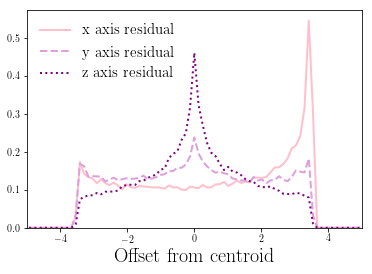

In [66]:
Hx,xbins = np.histogram(rotated.T[0], bins=np.linspace(-5,5,80), normed=1)
Hy,ybins = np.histogram(rotated.T[1], bins=np.linspace(-5,5,80), normed=1)
Hz,zbins = np.histogram(rotated.T[2], bins=np.linspace(-5,5,80), normed=1)

plt.plot((xbins[:-1]+xbins[1:])/2, Hx, '-', color='pink', lw=2, label='x axis residual')
plt.plot((ybins[:-1]+ybins[1:])/2, Hy, '--', color='plum', lw=2, label='y axis residual')
plt.plot((zbins[:-1]+zbins[1:])/2, Hz, ':', color='purple', lw=2, label='z axis residual')
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'Offset from centroid', fontsize=20)
plt.xlim(-5,5)
plt.ylim(ymin=0)
plt.show()


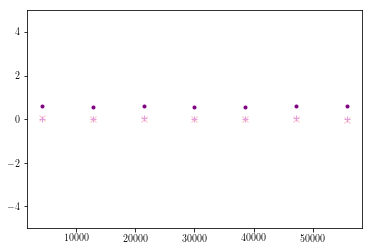

In [75]:
bins = np.linspace(0, rotated.T[0].size, 8).astype(int)
binnedx=[]
binnedy=[]
binnedz=[]
for lower,upper in zip(bins[:-1],bins[1:]):
    binnedx.append([rotated.T[0][lower:upper].mean(), rotated.T[0][lower:upper].std()/np.sqrt(rotated.T[0][lower:upper].size)])
    binnedy.append([rotated.T[1][lower:upper].mean(), rotated.T[1][lower:upper].std()/np.sqrt(rotated.T[1][lower:upper].size)])
    binnedz.append([rotated.T[2][lower:upper].mean(), rotated.T[2][lower:upper].std()/np.sqrt(rotated.T[2][lower:upper].size)])

b = (bins[:-1]+bins[1:])/2
binnedx=np.array(binnedx)
binnedy=np.array(binnedy)
binnedz=np.array(binnedz)   

plt.errorbar(b, binnedx.T[0], binnedx.T[1], marker='.', linestyle='none', color='purple', le)
plt.errorbar(b, binnedy.T[0], binnedy.T[1], marker='x', linestyle='none', color='pink', le)
plt.errorbar(b, binnedz.T[0], binnedz.T[1], marker='+', linestyle='none', color='plum', le)
plt.ylim(-5,5)
plt.show()

### Method 2: Working backwards from positions on a sphere

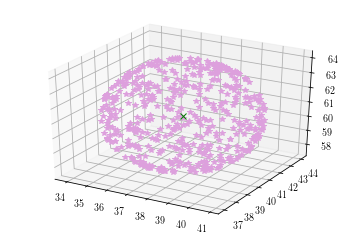

In [148]:
# First generate some random points on a sphere
# These should be isotropically distributed about the centroid by construction

reload(lib)
vec = lib.sample_sphere(500, seed=9099, norm=3.5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot(x0+vec[0], y0+vec[1], z0+vec[2], '*', color='plum')
ax.plot([x0], [y0], [z0], 'x', color='g')
plt.show()

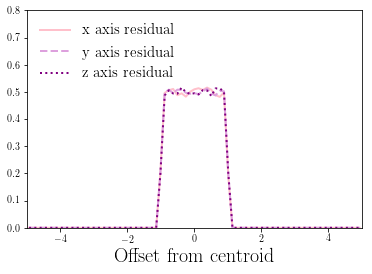

In [152]:
rotated = lib.sample_sphere(60000)
Hx,xbins = np.histogram(rotated[0], bins=np.linspace(-5,5,80), normed=1)
Hy,ybins = np.histogram(rotated[1], bins=np.linspace(-5,5,80), normed=1)
Hz,zbins = np.histogram(rotated[2], bins=np.linspace(-5,5,80), normed=1)

plt.plot((xbins[:-1]+xbins[1:])/2, Hx, '-', color='pink', lw=2, label='x axis residual')
plt.plot((ybins[:-1]+ybins[1:])/2, Hy, '--', color='plum', lw=2, label='y axis residual')
plt.plot((zbins[:-1]+zbins[1:])/2, Hz, ':', color='purple', lw=2, label='z axis residual')
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'Offset from centroid', fontsize=20)
plt.xlim(-5,5)
plt.ylim(ymin=0,ymax=0.8)
plt.show()


Mean offset from centroid: -0.0022423968325039198 -0.0008426328568007271 0.0034786101430279263


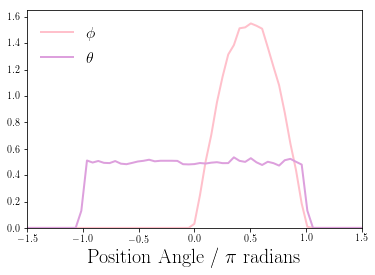

In [156]:
# These positions are already relative to the centroid
# Given enough points they should average away to zero
rotated = np.array(rotated)
resx = np.mean(rotated[0])
resy = np.mean(rotated[1])
resz = np.mean(rotated[2])
print 'Mean offset from centroid:', resx, resy, resz


#plt.close()
R = np.sqrt(rotated[0]*rotated[0]+rotated[1]*rotated[1]+rotated[2]*rotated[2])
phi = np.arccos(rotated[2]/R)
theta = np.arctan2(rotated[1],rotated[0])

Hp,pbins = np.histogram(phi/np.pi, bins=np.linspace(-2,2,80), normed=1)
Ht, tbins = np.histogram(theta/np.pi, bins=np.linspace(-2,2,80), normed=1)

plt.plot((pbins[:-1]+pbins[1:])/2, Hp, color='pink', lw=2, label=r'$\phi$')
plt.plot((tbins[:-1]+tbins[1:])/2, Ht, color='plum', lw=2, label=r'$\theta$')
plt.legend(loc='upper left', fontsize=16)
plt.xlim(-1.5,1.5)
plt.ylim(0,1.65)
plt.xlabel(r'Position Angle / $\pi$ radians', fontsize=20)
plt.show()


[3.5 0.  0. ]
[1. 0. 0.]


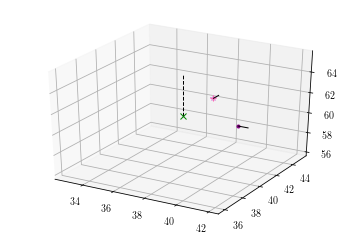

In [145]:
import mbii.lego_tools as utils
reload(lib)
position = np.array([x0+3.5,y0,z0])
rotated = np.array([x0,y0+3.5,z0])
dx = position[0]-x0
dy = position[1]-y0
dz = position[2]-z0
a3d = np.array([dx,dy,dz])
print vec
a3d /= np.sqrt(sum(a3d*a3d))
print a3d

pr = np.array([rotated[0]-x0,rotated[1]-y0,rotated[2]-z0 ])
p0 = np.array([position[0]-x0,position[1]-y0,position[2]-z0 ])
rotation_axis, rotation_angle = lib.infer_rotation_angle(p0,pr)

R = lib.build_rotation_matrix(alpha=rotation_angle, vec=rotation_axis)
rotated2 = np.dot(R,p0)
arot = np.dot(R,a3d)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot([position[0]],[position[1]],[position[2]], '.', color='purple')
v = np.array([a3d[0],a3d[1],a3d[2]])*0.6
ax.plot([position[0], position[0]+v[0]], [position[1], position[1]+v[1]], [position[2], position[2]+v[2]], '-', color='k')

ax.plot([rotated[0]],[rotated[1]],[rotated[2]], '*', color='plum')
ax.plot([x0+rotated2[0]],[y0+rotated2[1]],[z0+rotated2[2]], '+', color='hotpink')
ax.plot([x0, x0+rotation_axis[0]*4],[y0, y0+rotation_axis[1]*4],[z0,z0+rotation_axis[2]*4], '--', color='k')

v = np.array([arot[0],arot[1],arot[2]])*0.6
ax.plot([rotated2[0]+x0, rotated2[0]+x0+v[0]], [rotated2[1]+y0, rotated2[1]+y0+v[1]], [rotated2[2]+z0, rotated2[2]+z0+v[2]], '-', color='k')

ax.plot([x0], [y0], [z0], 'x', color='g')
ax.set_zlim(z0-5, z0+5)
ax.set_ylim(y0-5, y0+5)
ax.set_xlim(x0-5, x0+5)
plt.show()

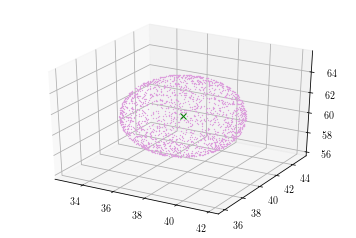

In [188]:
reload(lib)
npts = 2000
pos = np.array([x1-x0,y1-y0,z1-z0])
a3d = np.array([a1,a2,a3])
rotated = []
arotated = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
for i in xrange(npts):
    prot = lib.sample_sphere(1, norm=3.5, seed=i)
    prot = np.array([prot[0][0], prot[1][0], prot[2][0]])
    rotation_axis, rotation_angle = lib.infer_rotation_angle(pos,prot)
    R = lib.build_rotation_matrix(alpha=rotation_angle, vec=rotation_axis)
    arot = np.dot(R,a3d)
    rotated.append([prot[0],prot[1],prot[2]])
    arotated.append([arot[0],arot[1],arot[2]])
    
    ax.plot([prot[0]+x0], [prot[1]+y0], [prot[2]+z0], '*', markersize=0.8, color='plum')

ax.plot([x0], [y0], [z0], 'x', color='g')
ax.set_zlim(z0-5, z0+5)
ax.set_ylim(y0-5, y0+5)
ax.set_xlim(x0-5, x0+5)
plt.show()

In [186]:
print lib.sample_sphere(1, norm=3.5)
print lib.sample_sphere(1, norm=3.5)

[[ 3.17337667]
 [-0.25362287]
 [-1.45442633]]
[[ 3.17337667]
 [-0.25362287]
 [-1.45442633]]


2000
2000
2000


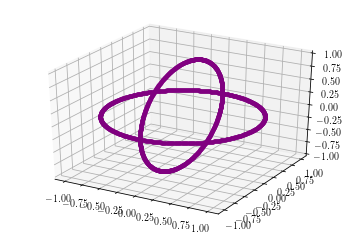

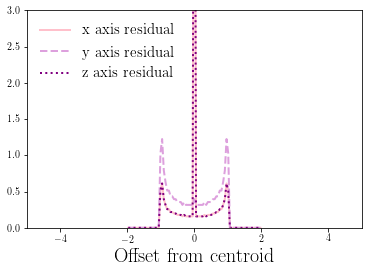

In [173]:
# One more numerical experiment - let's place points evenly in theta about a 2D ring
# Then project onto one axis and see what the histogram of offsets from the centre looks like


x = [np.cos(t) for t in np.linspace(0,np.pi/2,250)] + [-np.cos(t) for t in np.linspace(np.pi/2,np.pi,250)] + [np.cos(t) for t in np.linspace(np.pi, np.pi*6/4,250)] + [-np.cos(t) for t in np.linspace(np.pi*6/4,2*np.pi,250)] 


y = [np.sin(t) for t in np.linspace(0,np.pi/2,250)] + [-np.sin(t) for t in np.linspace(np.pi/2,np.pi,250)] + [np.sin(t) for t in np.linspace(np.pi, np.pi*6/4,250)] + [-np.sin(t) for t in np.linspace(np.pi*6/4,2*np.pi,250)] 
y+=[np.cos(t) for t in np.linspace(0,np.pi/2,250)] + [-np.cos(t) for t in np.linspace(np.pi/2,np.pi,250)] + [np.cos(t) for t in np.linspace(np.pi, np.pi*6/4,250)] + [-np.cos(t) for t in np.linspace(np.pi*6/4,2*np.pi,250)] 
x+=[0]*1000
x = np.array(x)
z = [0]*1000
z+=y[:1000]
y = np.array(y)
z=np.array(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot(x,y,z, '.', color='purple')
plt.show()

Hx,xbins = np.histogram(x, bins=np.linspace(-2,2,80), normed=1)
Hy,ybins = np.histogram(y, bins=np.linspace(-2,2,80), normed=1)
Hz,zbins = np.histogram(z, bins=np.linspace(-2,2,80), normed=1)

fig = plt.figure()
plt.plot((xbins[:-1]+xbins[1:])/2, Hx, '-', color='pink', lw=2, label='x axis residual')
plt.plot((ybins[:-1]+ybins[1:])/2, Hy, '--', color='plum', lw=2, label='y axis residual')
plt.plot((zbins[:-1]+zbins[1:])/2, Hz, ':', color='purple', lw=2, label='z axis residual')
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'Offset from centroid', fontsize=20)
plt.xlim(-5,5)
plt.ylim(ymin=0,ymax=3)
plt.show()

### Test the periodicity at the box edges

In [ ]:
x0 = 99.
y0 = 50.
z0 = 50.

reload(lib)
npts = 2000
pos = np.array([x1-x0,y1-y0,z1-z0])
a3d = np.array([a1,a2,a3])
rotated = []
arotated = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
for i in xrange(npts):
    prot = lib.sample_sphere(1, norm=3.5, seed=i)
    prot = np.array([prot[0][0], prot[1][0], prot[2][0]])
    rotation_axis, rotation_angle = lib.infer_rotation_angle(pos,prot)
    R = lib.build_rotation_matrix(alpha=rotation_angle, vec=rotation_axis)
    arot = np.dot(R,a3d)
    rotated.append([prot[0],prot[1],prot[2]])
    arotated.append([arot[0],arot[1],arot[2]])
    